In [1]:
import sys
import pymongo
import pandas as pd
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [2]:
connection = pymongo.MongoClient('localhost',27017)
db = connection.RealEstate
adverts = db.Adverts

In [23]:
cursor = adverts.find({},{'_id':0, 'Id':1, 'Price':1, 'Location':1, 'NumberOfRooms':1, 'Age':1, 'LivingAreaM2':1})
adverts_fields = ['id']
df = pd.DataFrame(list(cursor), columns = adverts_fields)

In [24]:
df = pd.DataFrame(list(adverts.find()))
df.fillna(0, inplace=True)
df[['LandAreaM2', 'LivingAreaM2', 'NumberOfRooms', 'YearBuilt']] = df[['LandAreaM2', 'LivingAreaM2', 'NumberOfRooms', 'YearBuilt']].astype(int)

df['LastPrice'] = 0
for index in range(len(df['Price'])):
    #str_price = str(df['Price'][index][0])
    #print("Index: " + str(index))
    #str_price = str_price.replace(' ', '')
    df['LastPrice'][index] = int(df['Price'][index][0]) # int(str_price)

df['LastPrice'] = df['LastPrice'].astype(int)
df.drop('_id', axis=1, inplace=True)

/home/scapogo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
df.head()

,Age,City,Id,LandAreaM2,LastUpdate,Link,LivingAreaM2,NumberOfRooms,Price,Street,YearBuilt,LastPrice
0,New,Senica,2425289,0,18.12.2016,http://www.nehnutelnosti.sk/2425289/directreal...,82,3,[0],Robotnícka,0,0
1,New,Senica,2609463,0,19.12.2016,http://www.nehnutelnosti.sk/2609463/nadstandar...,5,0,[1 ],Robotnícka,0,1
2,New,Senica,2637255,1553,19.12.2016,http://www.nehnutelnosti.sk/2637255/na-predaj-...,0,0,[0],Hurbanova,0,0
3,PartiallyRenewed,Senica,2653099,0,19.12.2016,http://www.nehnutelnosti.sk/2653099/3-izbovy-p...,74,3,[0],Hviezdoslavova,2013,0
4,0,Senica,2608608,108,19.12.2016,http://www.nehnutelnosti.sk/2608608/pozemok-v-...,0,0,[66 000],Železničná,0,66000


In [28]:
df.dtypes

Age              object
City             object
Id               object
LandAreaM2        int64
LastUpdate       object
Link             object
LivingAreaM2      int64
NumberOfRooms     int64
Price            object
Street           object
YearBuilt         int64
LastPrice         int64
dtype: object

In [29]:
df[df['City']=='Senica'].describe()

,LandAreaM2,LivingAreaM2,NumberOfRooms,YearBuilt,LastPrice
count,192.000000,192.000000,192.000000,192.000000,192.000000
mean,837.812500,397.364583,1.187500,330.885417,69006.088542
std,4384.113865,2436.032140,1.409114,741.903444,92173.454387
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.500000,0.000000,0.000000,28750.000000
50%,0.000000,67.500000,0.000000,0.000000,53300.000000
75%,304.750000,110.500000,3.000000,0.000000,75755.750000
max,34966.000000,32280.000000,5.000000,2016.000000,811200.000000


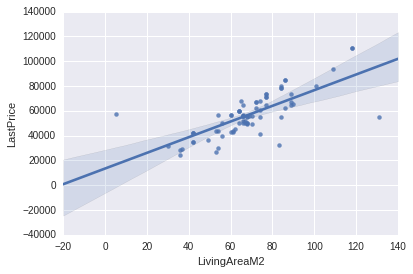

In [11]:
sns.regplot('LivingAreaM2', 'LastPrice', df[(df['NumberOfRooms']>0) & (df['LivingAreaM2']>0) & (df['LastPrice']>0)])

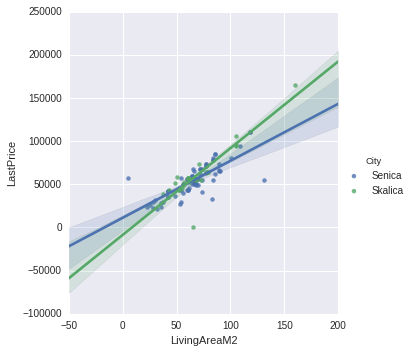

In [31]:
sns.lmplot('LivingAreaM2', 'LastPrice', hue='City', data=df[(df['NumberOfRooms']>0) & (df['LivingAreaM2']>0) & (df['LastPrice']>0)])

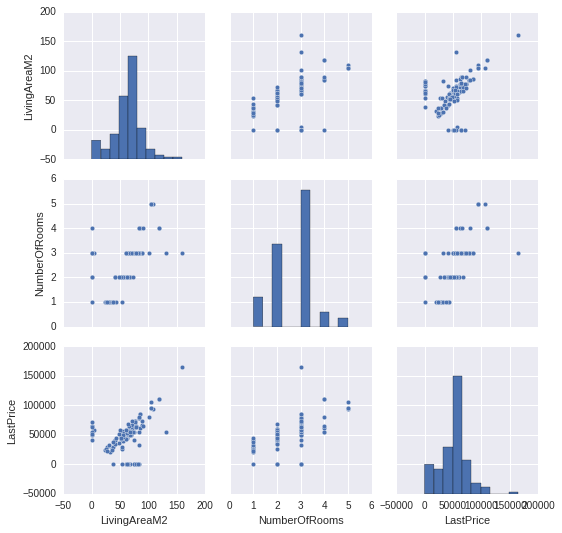

In [33]:
sns.pairplot(df[df['NumberOfRooms']>0][['Price', 'LivingAreaM2', 'NumberOfRooms', 'LastPrice']])

In [83]:
df[(df['LivingAreaM2']==0) & (df['NumberOfRooms']>0)]

,Age,City,Id,LandAreaM2,LastUpdate,Link,LivingAreaM2,NumberOfRooms,Price,Street,_id,LastPrice
7,New,Senica,2644435,0,18.12.2016,http://www.nehnutelnosti.sk/2644435/1-izbovy-b...,0,1,[40 635],Robotnícka,5856c9391d41c812d959e711,40635
165,CompletelyRenewed,Senica,2543486,0,19.09.2016,http://www.nehnutelnosti.sk/2543486/byt-3-1-so...,0,3,[65 000],Sotiná,5856c9d01d41c8130782f44e,0
171,Old,Senica,2577641,0,27.09.2016,http://www.nehnutelnosti.sk/2577641/senica-cen...,0,4,[54 600],0,5856c9d01d41c8130782f454,0
174,PartiallyRenewed,Senica,2585423,0,04.10.2016,http://www.nehnutelnosti.sk/2585423/pekny-zrek...,0,3,[64 900],Sotiná,5856c9d01d41c8130782f457,0


In [113]:
df = df[df['LastPrice']!=0]

In [112]:
df_new[df_new['LastPrice']==0]

,Age,City,Id,LandAreaM2,LastUpdate,Link,LivingAreaM2,NumberOfRooms,Price,Street,_id,LastPrice
